## Hitter's Case Study

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load Dataset
Hitters = pd.read_csv("https://storage.googleapis.com/dimensionless/Analytics/Hitters.csv", index_col=0)

In [3]:
Hitters .head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
Hitters.shape

(263, 20)

In [5]:
Hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [5]:
Hitters = Hitters.dropna()

In [7]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B82142F60>]],
      dtype=object)

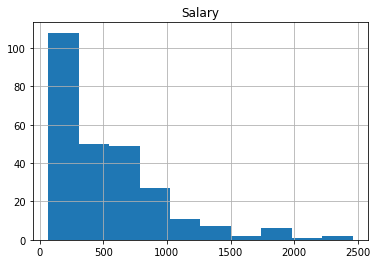

In [8]:
%matplotlib inline
Hitters.hist('Salary')

In [7]:
Hitters.Salary = np.log(Hitters.Salary)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B82484E80>]],
      dtype=object)

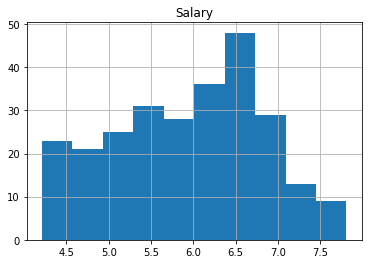

In [10]:
Hitters.hist('Salary')

## Creating feature matrix (X) and target array (y)

In [8]:
X = Hitters.copy() 

In [9]:
del X['Salary']

In [10]:
X = pd.get_dummies(X,columns=['League','Division','NewLeague'],drop_first=True)

In [11]:
X.shape

(263, 19)

In [12]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [15]:
y=Hitters.Salary


## Spliting Dataset into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 19), (53, 19), (210,), (53,))

## PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
# Apply scaling 
scalar = StandardScaler()

In [20]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
-Ozzie Guillen,547,137,2,58,47,12,2,1038,271,3,129,80,24,261,459,22,0,1,0
-Milt Thompson,299,75,6,38,23,26,3,580,160,8,71,33,44,212,1,2,1,0,1
-Glenn Wilson,584,158,15,70,84,42,5,2358,636,58,265,316,134,331,20,4,1,0,1
-Mookie Wilson,381,110,9,61,45,32,7,3015,834,40,451,249,168,228,7,5,1,0,1
-Davey Lopes,255,70,7,49,35,43,15,6311,1661,154,1019,608,820,51,54,8,1,0,1


In [21]:
scalar.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scalar.transform(X_train)

array([[ 1.00043399,  0.67991177, -1.10503803, ..., -1.        ,
         0.98113038, -0.95346259],
       [-0.72361889, -0.73534822, -0.64845567, ...,  1.        ,
        -1.01923253,  1.04880885],
       [ 1.25765155,  1.15927402,  0.37885465, ...,  1.        ,
        -1.01923253,  1.04880885],
       ...,
       [ 0.75016825,  0.70273854,  1.52031056, ..., -1.        ,
         0.98113038, -0.95346259],
       [-0.41773854, -0.09619855, -0.64845567, ..., -1.        ,
        -1.01923253, -0.95346259],
       [ 0.29134772, -0.18750564, -1.21918362, ..., -1.        ,
         0.98113038, -0.95346259]])

In [23]:
Scale_X = pd.DataFrame(scalar.transform(X_train),columns=X_train.columns)
Scale_X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,1.000434,0.679912,-1.105038,0.147801,-0.189856,-1.405276,-1.110994,-0.698876,-0.686170,-0.794495,-0.692556,-0.769664,-0.888912,-0.141681,2.453172,2.135975,-1.0,0.981130,-0.953463
1,-0.723619,-0.735348,-0.648456,-0.658387,-1.136317,-0.740404,-0.899472,-0.896033,-0.853703,-0.736728,-0.862898,-0.911585,-0.813165,-0.303922,-0.800359,-1.016202,1.0,-1.019233,1.048809
2,1.257652,1.159274,0.378855,0.631514,1.269272,0.019449,-0.476428,-0.130651,-0.135270,-0.159053,-0.293133,-0.057041,-0.472302,0.090092,-0.665387,-0.700984,1.0,-1.019233,1.048809
3,-0.153569,0.063589,-0.306019,0.268730,-0.268727,-0.455460,-0.053384,0.152170,0.163574,-0.367016,0.253135,-0.259354,-0.343532,-0.250945,-0.757736,-0.543375,1.0,-1.019233,1.048809
4,-1.029499,-0.849482,-0.534310,-0.214984,-0.663086,0.066939,1.638792,1.571012,1.411775,0.950082,1.921311,0.824678,2.125828,-0.836999,-0.423859,-0.070549,1.0,-1.019233,1.048809


In [24]:
Scale_X.mean(), Scale_X.std()

(AtBat          3.409971e-17
 Hits           1.312442e-16
 HmRun          7.718693e-17
 Runs          -9.965573e-17
 RBI           -9.198991e-17
 Walks          1.083789e-16
 Years         -1.163091e-17
 CAtBat         3.172066e-17
 CHits         -3.119198e-17
 CHmRun         2.960595e-17
 CRuns          3.912214e-17
 CRBI           5.286776e-18
 CWalks         9.516197e-17
 PutOuts        8.115202e-17
 Assists       -4.017950e-17
 Errors        -2.643388e-17
 League_N       0.000000e+00
 Division_W     3.256654e-16
 NewLeague_N    2.114711e-18
 dtype: float64, AtBat          1.002389
 Hits           1.002389
 HmRun          1.002389
 Runs           1.002389
 RBI            1.002389
 Walks          1.002389
 Years          1.002389
 CAtBat         1.002389
 CHits          1.002389
 CHmRun         1.002389
 CRuns          1.002389
 CRBI           1.002389
 CWalks         1.002389
 PutOuts        1.002389
 Assists        1.002389
 Errors         1.002389
 League_N       1.002389
 Divisio

In [25]:
pca_hitters = PCA()

In [26]:
pca_hitters.fit(Scale_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca_hitters.components_

array([[ 2.04754179e-01,  2.02979783e-01,  2.07514797e-01,
         2.04589978e-01,  2.38576821e-01,  2.09941742e-01,
         2.81119516e-01,  3.27743272e-01,  3.26834789e-01,
         3.17113044e-01,  3.34415352e-01,  3.38669034e-01,
         3.16258066e-01,  8.66869874e-02,  1.30614657e-02,
         8.60140095e-03, -3.85947744e-02, -2.67962898e-02,
        -2.48843008e-02],
       [-3.76885855e-01, -3.69432754e-01, -2.31531047e-01,
        -3.73211917e-01, -3.11066645e-01, -2.40078774e-01,
         2.70065491e-01,  2.00688202e-01,  1.93304429e-01,
         1.29852646e-01,  1.83917744e-01,  1.71663159e-01,
         1.95861811e-01, -1.75765862e-01, -1.47937937e-01,
        -1.65797029e-01,  1.20905080e-01,  2.98662531e-02,
         9.64843891e-02],
       [ 1.14161417e-01,  1.04261274e-01, -2.25714897e-01,
        -1.39243646e-02, -6.19967178e-02,  3.69174247e-03,
         2.89075313e-02,  7.74876924e-02,  7.92131094e-02,
        -1.15414282e-01,  3.52029021e-02,  5.90750229e-04,
    

In [27]:
pca_loadings = pd.DataFrame(pca_hitters.components_,columns=X_train.columns)
pca_loadings
pca_loadings.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
AtBat,0.204754,-0.376886,0.114161,0.048575,-0.011897,-0.093355,0.134612,0.250967,-0.044366,0.167293,0.054086,-0.145834,0.051998,0.238323,-0.494922,-0.562080,0.154812,0.099824,-0.047075
Hits,0.202980,-0.369433,0.104261,0.031825,-0.035911,-0.090516,0.161900,0.364668,-0.065209,0.114259,0.103421,-0.117205,0.020107,0.211566,-0.047730,0.725766,-0.133564,-0.037959,0.080985
HmRun,0.207515,-0.231531,-0.225715,-0.222484,0.177638,-0.112976,-0.518957,-0.133365,0.157265,-0.263577,-0.114727,0.397248,-0.080563,0.001958,-0.405561,0.167355,0.070059,0.042799,0.023823
Runs,0.204590,-0.373212,-0.013924,-0.053805,-0.055246,-0.170793,0.189680,0.088932,-0.200493,0.047186,-0.052032,0.444176,-0.437266,-0.205595,0.467576,-0.177458,0.090583,-0.051244,-0.053029
RBI,0.238577,-0.311067,-0.061997,-0.118655,0.071226,-0.068591,-0.354076,0.063510,0.168246,-0.231591,0.081460,-0.393884,0.361968,0.014631,0.510860,-0.194874,-0.111694,-0.051202,-0.014413
Walks,0.209942,-0.240079,0.003692,-0.147887,-0.062140,-0.098216,0.432329,-0.693154,-0.052753,-0.158247,-0.011853,-0.265312,0.047482,-0.241705,-0.159626,0.087186,-0.056902,-0.002145,0.012918
Years,0.281120,0.270065,0.028908,0.092393,-0.004973,0.020719,0.003528,0.125305,0.032920,-0.502694,0.082873,-0.338426,-0.638451,0.154463,-0.039358,-0.032570,-0.079929,0.077768,-0.028048
CAtBat,0.327743,0.200688,0.077488,0.088234,-0.007506,0.023380,0.039185,0.134010,-0.061797,-0.102383,-0.025600,0.065390,0.150940,-0.199433,-0.116840,-0.066265,0.133484,-0.730434,0.408948
CHits,0.326835,0.193304,0.079213,0.080601,-0.008589,0.035074,0.052178,0.183340,-0.093408,-0.113167,-0.052212,0.087275,0.264816,-0.308690,-0.085387,0.094917,0.045546,0.011432,-0.767856
CHmRun,0.317113,0.129853,-0.115414,-0.057708,0.063692,-0.009914,-0.227078,-0.200269,0.142998,0.675842,0.051127,-0.141708,-0.273693,0.029734,-0.014381,-0.027728,-0.324957,-0.233718,-0.182222


In [31]:
pca_hitters.explained_variance_

array([7.39299540e+00, 4.06075122e+00, 2.07889484e+00, 1.56010465e+00,
       1.00161201e+00, 8.09355837e-01, 6.79470934e-01, 5.25551260e-01,
       2.84978806e-01, 1.80495506e-01, 1.39448234e-01, 1.27983750e-01,
       9.20153279e-02, 5.92385951e-02, 4.96958504e-02, 3.09919837e-02,
       1.20798838e-02, 4.16179035e-03, 1.08321527e-03])

In [32]:
pca_hitters.explained_variance_ratio_

array([3.87252140e-01, 2.12706016e-01, 1.08894492e-01, 8.17197674e-02,
       5.24653911e-02, 4.23948296e-02, 3.55913347e-02, 2.75288755e-02,
       1.49274612e-02, 9.45452651e-03, 7.30443128e-03, 6.70391074e-03,
       4.81985051e-03, 3.10297403e-03, 2.60311597e-03, 1.62338962e-03,
       6.32755816e-04, 2.17998542e-04, 5.67398476e-05])

In [33]:
PCscore = pd.DataFrame(pca_hitters.fit_transform(Scale_X),columns=pca_loadings.T.columns)
PCscore

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.913351,-2.016561,1.287834,3.406292,0.490089,0.455181,-0.283912,0.711415,0.203215,0.756903,0.009705,0.187534,0.138280,0.298862,0.179133,-0.244704,0.026670,0.051182,-0.008064
1,-2.989787,0.845543,0.204023,-1.682557,-0.939066,-0.272220,0.133924,0.332007,-0.014876,0.293909,-0.057416,0.188574,-0.045094,0.023119,-0.204411,0.001452,0.030056,-0.012457,-0.033561
2,0.425130,-1.592587,0.525885,-1.957221,-0.715332,-0.698986,-0.238121,1.170505,-0.031878,0.175267,0.222160,-0.470954,0.377041,0.157408,-0.005288,-0.160390,0.097488,-0.061852,0.006159
3,-0.400385,0.570671,0.612446,-1.392644,-0.930434,-0.424112,0.066543,0.848055,-0.489832,-0.071178,-0.037561,0.262017,-0.016993,-0.213262,0.063858,-0.038701,-0.196735,-0.072623,0.032909
4,2.534096,3.574579,1.005409,-0.459106,-1.174625,-0.419727,0.119879,-0.507515,-0.599658,-0.336387,-0.191138,0.566551,-0.053243,0.354355,0.366295,-0.108279,-0.390342,-0.120644,0.036410
5,-3.304390,2.489801,0.059596,-1.155543,1.111055,-0.188694,-0.331007,0.020078,0.550708,-0.396933,-0.103523,-0.019065,-0.480035,0.001820,0.078758,0.090915,-0.104371,0.028849,-0.034294
6,6.521557,0.021132,-1.772704,-0.378048,-0.912035,-0.458344,0.183359,-1.537043,-0.126260,-0.083394,-0.005179,-0.206642,0.142868,0.351754,0.156782,-0.145872,-0.229758,-0.067475,-0.026690
7,6.902668,-0.640337,-1.272993,0.152812,-0.770252,-0.255327,-0.580407,0.761973,-0.458869,1.445924,0.302146,-0.759936,0.100595,-0.607217,0.500999,0.251061,-0.240072,0.051941,-0.047821
8,-0.196502,-2.187854,-1.081183,0.246926,0.639011,0.018139,1.993105,-0.067013,-0.896210,-0.029632,0.093326,-0.252109,-0.175172,0.007296,0.515867,-0.384965,0.004728,-0.011116,0.004269
9,0.978522,-2.523678,3.206865,0.913715,0.470862,-0.630439,1.362772,0.516797,0.177312,0.189062,0.079040,0.266366,-0.106746,0.187707,0.097926,0.494138,-0.154426,-0.081158,0.005145


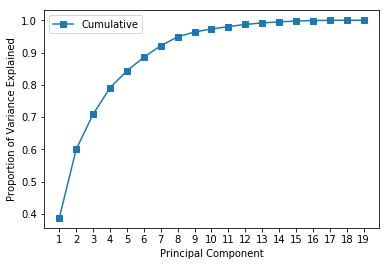

In [34]:
plt.plot(np.arange(1,20), np.cumsum(pca_hitters.explained_variance_ratio_), '-s', label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
#plt.xlim(0.75,4.25)
#plt.ylim(0.3,1.05)
plt.xticks(np.arange(1,20))
plt.legend(loc=2);

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
pca_lm =LinearRegression()

In [38]:
pca_lm.fit(PCscore.iloc[:,:11],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
pca_lm.coef_

array([ 0.23683683, -0.02680584,  0.05066554, -0.0450442 , -0.08690322,
        0.03561553,  0.07220147,  0.1287593 ,  0.04964748, -0.2254469 ,
        0.21205756])

In [40]:
pca_lm.intercept_

5.930476405176759

In [41]:
pca_lm.score(PCscore.iloc[:,:11],y_train)

0.559406817911936

In [42]:
Scale_Xtest = scalar.transform(X_test)
Scale_Xtest

D:\DataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.65284268,  0.65708499, -0.53431007, ..., -1.        ,
        -1.01923253, -0.95346259],
       [ 0.93091573,  0.90817951,  1.29201938, ...,  1.        ,
        -1.01923253,  1.04880885],
       [ 0.61808355,  0.65708499, -0.76260126, ..., -1.        ,
        -1.01923253, -0.95346259],
       ...,
       [ 0.61113172,  0.77121886, -0.07772771, ..., -1.        ,
        -1.01923253, -0.95346259],
       [-1.30062046, -1.16905693, -0.87674685, ..., -1.        ,
        -1.01923253, -0.95346259],
       [ 1.36192894,  1.72994337, -0.1918733 , ..., -1.        ,
        -1.01923253, -0.95346259]])

In [43]:
pca_test = pca_hitters.transform(Scale_Xtest)
pca_test

array([[ 5.54749394e-01, -1.82524354e-01,  2.22611104e-01, ...,
         1.29185278e-01, -2.34710866e-02, -3.08965263e-02],
       [ 1.12143548e+00, -1.56902564e+00,  1.97327649e+00, ...,
        -1.53545708e-01, -3.74460746e-02, -5.42994814e-02],
       [ 3.24989456e+00, -5.29720895e-01,  1.18315284e+00, ...,
        -8.59910040e-02,  5.10986722e-02,  6.10717069e-02],
       ...,
       [ 1.84341709e+00,  3.43578816e-01, -1.44599819e+00, ...,
        -9.59991035e-02, -2.97217282e-03, -9.50532117e-02],
       [-1.46864071e+00,  2.33237552e+00, -1.44866741e+00, ...,
         1.43242391e-01, -5.60212012e-02,  3.83886226e-02],
       [ 5.28400958e-01, -2.69363362e+00,  6.97005002e-01, ...,
         1.25454787e-01,  8.20644865e-02,  6.51579569e-02]])

In [44]:
pca_test.shape

(53, 19)

In [45]:
y_pred_pca = pca_lm.predict(pca_test[:,:11])
y_pred_pca

array([6.36056717, 6.32773804, 6.86513103, 5.47495086, 6.0298173 ,
       5.40030873, 6.02532314, 5.51411729, 6.74881188, 6.45157398,
       5.996553  , 7.18742907, 6.38612824, 5.63664758, 5.42640988,
       6.47277453, 6.46802232, 4.9167955 , 6.51838457, 5.52030579,
       5.74890697, 6.39845538, 6.03143982, 5.81120426, 6.48625073,
       4.85905842, 6.91358963, 5.44452608, 6.41784853, 4.6989961 ,
       5.00138245, 4.59774483, 5.61200932, 5.68243374, 5.36406725,
       6.2453201 , 7.34768743, 5.38216904, 4.84397354, 5.3818124 ,
       4.73398325, 5.45651036, 5.91057549, 5.92268459, 6.96716939,
       6.36128168, 6.07961487, 5.11030069, 5.30765567, 6.18522887,
       6.72334331, 5.71834883, 6.23105693])

In [46]:
SSE_pca= sum((y_test-y_pred_pca)**2)
SST= sum((y_test-np.mean(y_train))**2)
r2_pca = 1-SSE_pca/SST
r2_pca

0.34484009851872754